# Monte Carlo Methods
In 1733 Georges Buffon posed the question[<sup>1</sup>](#wolfram):

> When dropping a needle of length $l$ on a floor made up of parallel strips of width $w>l$, what is the probability, $p$, that the needle crosses a border between two strips?

The solution was eventually found to be $$p=\frac{2l}{\pi w},$$ which can be rearranged to get $$\pi=\frac{2l}{pw}.$$ This means that if we can estimate $p$, by dropping many needles on a floor with parallel lines on it and finding the proportion that cross a line, we are able to estimate $\pi$!

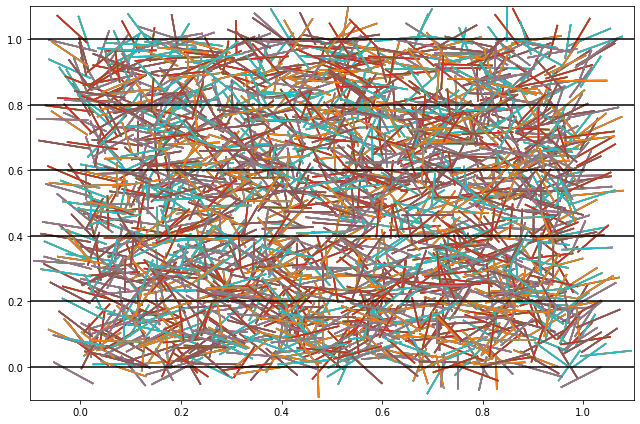

In [1]:
# import packages:
import matplotlib.pyplot as plt
import numpy as np
import random

pi_estimates = [] # initialise empty list for pi estimates
count = 0 
n = 2000
plt.figure(figsize=(9, 6))
for i in range(1,n+1): # drop needle n times
    coord_0 = (random.uniform(0,1),random.uniform(0,1)) # get a random coordinate
    theta = np.pi*random.uniform(0,2) # get a random angle
    coord_1 = (coord_0[0]+0.1*np.sin(theta),coord_0[1]+0.1*np.cos(theta)) # use to make a second coordinate
    x_coordinates = [coord_0[0],coord_1[0]]
    y_coordinates = [coord_0[1],coord_1[1]]
    y_coordinates.sort() # make it easier to check if the needle crosses a line
    for j in range(6): # check for each line
        if y_coordinates[0] <= j/5 and y_coordinates[1] > j/5:
            count += 1
        plt.plot(x_coordinates,y_coordinates) # plot needle
    if count > 0:
        pi_estimates.append((2*0.1*i)/(0.2*count)) # update pi_estimates with current estimate
    else: # in case no needles have crossed a line yet
        pi_estimates.append(0)        
for i in range(6):
    plt.axhline(y=i/5, color='black') # plot lines
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))  
plt.tight_layout()
plt.show()

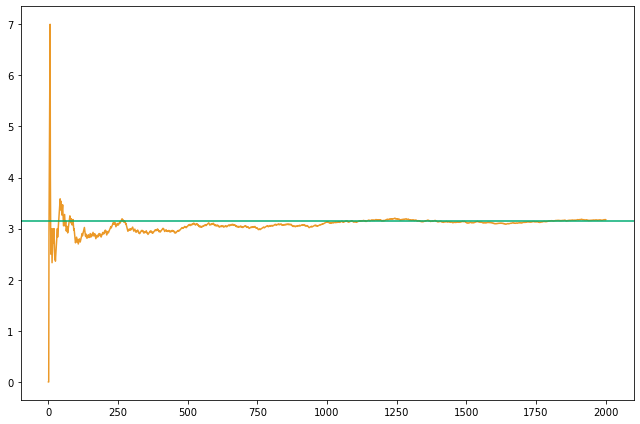

In [2]:
plt.figure(figsize=(9, 6))
plt.plot(range(1,n+1),pi_estimates, color='#eb9928') # plot estimates against number of needles dropped
plt.axhline(y=np.pi, color='#00ac72')
plt.tight_layout()
plt.show()

In [3]:
pi_est = (2*0.1*n)/(0.2*count)
print(pi_est)

3.1746031746031744


This method for estimating $\pi$ was an early example of a [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method), a powerful type of tool for solving mathematical problems using random sampling.

<span id="wolfram"> Eric W. Weisstein. Buffon’s Needle Problem. 2021. url: https://mathworld.wolfram.com/BuffonsNeedleProblem.html (visited on Nov. 19, 2021).</span> 